# Google Data Analytics Capstone Project

## 1. Ask

**Business Task**  
This project aims to identify which factors influence car prices (MSRP).  
The goal is to support manufacturers or dealerships in understanding price drivers and customer preferences.

**Key Questions:**
- Which features (e.g., engine HP, cylinders, fuel type) correlate most with MSRP?
- Do drivetrain or vehicle size influence price?
- Can patterns be found in popular or affordable models?

## 2. Prepare

**Data Source**:  
The dataset contains specifications of various car models from different manufacturers.  
It includes variables such as engine HP, fuel type, driven wheels, popularity, and MSRP.

**Initial Observations:**
- Format: CSV file
- Some columns contain missing values (e.g., Engine HP, Fuel Type)
- Some columns may have duplicates or inconsistent entries

**Tools Used**:
- Python (pandas, numpy) for cleaning
- R (ggplot2, corrplot) for visualizations

I start by importing the data and taking a quick look at the structure.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

data_path = os.path.join("..", "data", "car_data.csv")
df_car = pd.read_csv(data_path)

df_car.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


## 3. Process

### Handling Missing Values
- Engine HP: Filled with median
- Fuel Type: Filled with most common value (mode) if ratio > 60%
- Engine Cylinders: Filled with most frequent value

In [5]:
# Checking NaN

nan_count = df_car.isna().sum()
nan_count[nan_count > 0]

Engine Fuel Type       3
Engine HP             69
Engine Cylinders      30
Number of Doors        6
Market Category     3742
dtype: int64

"Fuel Type Engine"

In [6]:
# Which value appears the most?

most_common_fuel = df_car["Engine Fuel Type"].mode()[0]
count_of_most_common_fuel = df_car["Engine Fuel Type"].value_counts().iloc[0]
total_count_fuel = df_car["Engine Fuel Type"].value_counts().sum()
most_common_ratio_fuel = round(count_of_most_common_fuel / total_count_fuel * 100, 2)
print(most_common_fuel)
print(count_of_most_common_fuel)
print(most_common_ratio_fuel)


regular unleaded
7172
60.21


Because of the ratio (60.21 %) I decided to fill the NaN values with the most common value.

In [7]:
# Filling the NaN values with most_common

df_car["Engine Fuel Type new"] = df_car["Engine Fuel Type"].fillna(most_common_fuel)
df_car["Engine Fuel Type new"].isna().sum()

0

"Engine HP"

In [8]:
# Mean, min and max of "Engine HP"

min_hp = df_car["Engine HP"].min()
max_hp = df_car["Engine HP"].max()
avg_hp = df_car["Engine HP"].mean()
median_hp = df_car["Engine HP"].median()
print("Min:", round(min_hp, 1))
print("Max:", round(max_hp, 1))
print("Avg:", round(avg_hp, 1))
print("Median:", round(median_hp, 1))

Min: 55.0
Max: 1001.0
Avg: 249.4
Median: 227.0


After comparing mean and median according to the min and max values, I decided to fill the NaN values in "Engine HP" with the median.

In [9]:
# Filling missing values with median

df_car["Engine HP new"] = df_car["Engine HP"].fillna(df_car["Engine HP"].median())
df_car["Engine HP new"].isna().sum()

0

"Engine Cylinders"

In [10]:
# Which value appears the most?

most_common_cyl = df_car["Engine Cylinders"].mode()[0]
count_of_most_common_cyl = df_car["Engine Cylinders"].value_counts().iloc[0]
total_count_cyl = df_car["Engine Cylinders"].value_counts().sum()
most_common_ratio_cyl = round(count_of_most_common_cyl / total_count_cyl * 100, 2)
print(most_common_cyl)
print(count_of_most_common_cyl)
print(most_common_ratio_cyl)

4.0
4752
39.99


It is similar to the "Fuel Type Engine" column, NaN values will be replaced with the most common value in a new column.

In [11]:
# Filling the NaN values with most_common

df_car["Engine Cylinders new"] = df_car["Engine Cylinders"].fillna(most_common_cyl)
df_car["Engine Cylinders new"].isna().sum()

0

"Number of Doors"

In [12]:
# Which value appears the most?

most_common_doors = df_car["Number of Doors"].mode()[0]
count_of_most_common_doors = df_car["Number of Doors"].value_counts().iloc[0]
total_count_doors = df_car["Number of Doors"].value_counts().sum()
most_common_ratio_doors = round(count_of_most_common_doors / total_count_doors * 100, 2)
print(most_common_doors)
print(count_of_most_common_doors)
print(most_common_ratio_doors)

4.0
8353
70.15


It is similar to the "Fuel Type Engine" column, NaN values will be replaced with the most common value in a new column.

In [13]:
# Filling the NaN values with most_common

df_car["Number of Doors new"] = df_car["Number of Doors"].fillna(most_common_doors)
df_car["Number of Doors new"].isna().sum()

0

"Market Category"

Here I will use another way to fill the missing values. The goal is to fill the NaN value with values from similar cars.

In [14]:
# Searching rows with NaN values in "Market Category"

nan_rows_cat = df_car[df_car["Market Category"].isna()]

In [15]:
# Searching rows without NaN values in "Market Category"
non_nan_rows = df_car[df_car["Market Category"].notna()]

In [16]:
# Creating a dictionary with combinations of "Make", "Model", "Engine HP", "Number of Doors" and the specific "Market Category"

market_cat_dict = non_nan_rows.set_index(
    ["Make", "Model", "Engine HP", "Number of Doors"]
)["Market Category"].to_dict()

In [17]:
# Defining a function to fill the NaN values

def fill_missing_cat(row):
  if pd.isna(row["Market Category"]):
    key = (row["Make"], row["Model"], row["Engine HP"], row["Number of Doors"])
    if key in market_cat_dict:
      return market_cat_dict[key]
  return row["Market Category"]

In [18]:
# Using the function to create a new column with filled NaN values

df_car["Market Category new"] = df_car.apply(fill_missing_cat, axis=1)

# Checking number of NaN values after filling

df_car["Market Category new"].isna().sum()

3150

Nearly 600 rows were filled with best fitting categories. The rest need either more attention or should be filled with another value. In this case I will fill the NaN values with 'Unknown'.
For future cleaning processes trying some other combinations could be a good method.

In [19]:
# Filling missing values with "Unknown"

df_car["Market Category new"] = df_car["Market Category new"].fillna("Unknown")
df_car["Market Category new"].isna().sum()

0

Dropping Duplicates

In [20]:
df_car.drop_duplicates(keep="first", inplace=True)

Standardizing entries

Some entries can be put together, because there is no real difference between them. I will check a few columns to see where I can make changes.

In [21]:
df_car.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,...,Vehicle Style,highway MPG,city mpg,Popularity,MSRP,Engine Fuel Type new,Engine HP new,Engine Cylinders new,Number of Doors new,Market Category new
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",...,Coupe,26,19,3916,46135,premium unleaded (required),335.0,6.0,2.0,"Factory Tuner,Luxury,High-Performance"
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",...,Convertible,28,19,3916,40650,premium unleaded (required),300.0,6.0,2.0,"Luxury,Performance"
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",...,Coupe,28,20,3916,36350,premium unleaded (required),300.0,6.0,2.0,"Luxury,High-Performance"
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",...,Coupe,28,18,3916,29450,premium unleaded (required),230.0,6.0,2.0,"Luxury,Performance"
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,...,Convertible,28,18,3916,34500,premium unleaded (required),230.0,6.0,2.0,Luxury


In [22]:
list(df_car["Driven_Wheels"].unique())

['rear wheel drive',
 'front wheel drive',
 'all wheel drive',
 'four wheel drive']

In [23]:
# Replacing 'four wheel drive' with 'all wheel drive'

df_car.loc[df_car["Driven_Wheels"] == "four wheel drive", "Driven_Wheels"] = "all wheel drive"

list(df_car["Driven_Wheels"].unique())


['rear wheel drive', 'front wheel drive', 'all wheel drive']

All models From 'Tesla' are electric vehicles, so there is no need to give a number of cylinders because they do not have any.

In [24]:
# Replacing number of cylinders at Tesla with "0.0"

df_car.loc[df_car["Make"] == "Tesla", "Engine Cylinders new"] = df_car["Engine Cylinders new"].replace(12.0, 0.0)

df_car.loc[df_car["Make"] == "Tesla", "Engine Cylinders new"].unique()

array([0.])

I will check which data types are in the dataframe and then I will decide wether to change or not.

In [25]:
df_car.dtypes

Make                     object
Model                    object
Year                      int64
Engine Fuel Type         object
Engine HP               float64
Engine Cylinders        float64
Transmission Type        object
Driven_Wheels            object
Number of Doors         float64
Market Category          object
Vehicle Size             object
Vehicle Style            object
highway MPG               int64
city mpg                  int64
Popularity                int64
MSRP                      int64
Engine Fuel Type new     object
Engine HP new           float64
Engine Cylinders new    float64
Number of Doors new     float64
Market Category new      object
dtype: object

In my opinion there is no need to change any data types except one columns but I will come to this later. Columns with qualitative values are in the right format, also the columns with qualitative values are either integers or floats.
It is open to discussion wether to change colums like "Engine HP", "Engine Cylinders" or "Number of Doors" should remain as float or be converted to integer. There are no 2.78 doors or 6.39 cylinders. For now, I will use them in their given format.
The only column I would like to change is the "Make" columns. Every value in "Make" is a real category and not a specific number like ID or VIN. Changing that columns to category could save storage and it can be faster for later actions. I will also change the "Transmission Type", "Driven_Wheels" and "Vehicle Size" columns to category.


In [26]:
#Checking dataset before change

df_car.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11199 entries, 0 to 11913
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Make                  11199 non-null  object 
 1   Model                 11199 non-null  object 
 2   Year                  11199 non-null  int64  
 3   Engine Fuel Type      11196 non-null  object 
 4   Engine HP             11130 non-null  float64
 5   Engine Cylinders      11169 non-null  float64
 6   Transmission Type     11199 non-null  object 
 7   Driven_Wheels         11199 non-null  object 
 8   Number of Doors       11193 non-null  float64
 9   Market Category       7823 non-null   object 
 10  Vehicle Size          11199 non-null  object 
 11  Vehicle Style         11199 non-null  object 
 12  highway MPG           11199 non-null  int64  
 13  city mpg              11199 non-null  int64  
 14  Popularity            11199 non-null  int64  
 15  MSRP                  11

In [27]:
# Changing the data types

df_car["Make"] = df_car["Make"].astype("category")
df_car["Driven_Wheels"] = df_car["Driven_Wheels"].astype("category")
df_car["Transmission Type"] = df_car["Transmission Type"].astype("category")
df_car["Vehicle Size"] = df_car["Vehicle Size"].astype("category")

In [28]:
df_car.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11199 entries, 0 to 11913
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Make                  11199 non-null  category
 1   Model                 11199 non-null  object  
 2   Year                  11199 non-null  int64   
 3   Engine Fuel Type      11196 non-null  object  
 4   Engine HP             11130 non-null  float64 
 5   Engine Cylinders      11169 non-null  float64 
 6   Transmission Type     11199 non-null  category
 7   Driven_Wheels         11199 non-null  category
 8   Number of Doors       11193 non-null  float64 
 9   Market Category       7823 non-null   object  
 10  Vehicle Size          11199 non-null  category
 11  Vehicle Style         11199 non-null  object  
 12  highway MPG           11199 non-null  int64   
 13  city mpg              11199 non-null  int64   
 14  Popularity            11199 non-null  int64   
 15  MSRP   

Filter Data

I will filter the dataset to proceed only with cars build in 1995 and later.

In [29]:
# Filtering the data for cars from the year 1995 and later

df_car_filtered = df_car.loc[df_car["Year"] >= 1995]
print("Shape before filtering:", df_car.shape)
print("Shape after filtering:", df_car_filtered.shape)

Shape before filtering: (11199, 21)
Shape after filtering: (10603, 21)


Standardize text entries by converting these columns' entries to lowercase


*   Vehicle Size
*   Market category



In [30]:
# Changing columns' entries to lowercase

df_car_filtered.loc[:, "Vehicle Size"] = df_car_filtered["Vehicle Size"].str.lower()
df_car_filtered.loc[:, "Market Category"] = df_car_filtered["Market Category"].str.lower()
df_car_filtered.loc[:, "Market Category new"] = df_car_filtered["Market Category new"].str.lower()

/var/folders/sj/yq8_zfcj0vg1v9dyw7qpp8rm0000gn/T/ipykernel_17051/862499426.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['compact' 'compact' 'compact' ... 'midsize' 'midsize' 'midsize']' has dtype incompatible with category, please explicitly cast to a compatible dtype first.
  df_car_filtered.loc[:, "Vehicle Size"] = df_car_filtered["Vehicle Size"].str.lower()


Creating a new dataframe that includes all tasks of the cleaning process

In [31]:
# Setting up a new dataframe

df_car_cleaned = df_car.loc[:, ["Make", "Model", "Year", "Engine Fuel Type new", "Engine HP new", "Engine Cylinders new", "Transmission Type", "Driven_Wheels", "Number of Doors new", "Market Category new", "Vehicle Size", "Vehicle Style", "highway MPG", "city mpg", "Popularity", "MSRP"]]

In [32]:
df_car_cleaned.head()

,Make,Model,Year,Engine Fuel Type new,Engine HP new,Engine Cylinders new,Transmission Type,Driven_Wheels,Number of Doors new,Market Category new,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [33]:
# Overview of the cleaned data

df_car_cleaned.describe().round(2)

,Year,Engine HP new,Engine Cylinders new,Number of Doors new,highway MPG,city mpg,Popularity,MSRP
count,11199.00,11199.00,11199.00,11199.00,11199.00,11199.00,11199.00,11199.00
mean,2010.71,253.23,5.66,3.45,26.61,19.73,1558.48,41925.93
std,7.23,109.83,1.80,0.87,8.98,9.18,1445.67,61535.05
min,1990.00,55.00,0.00,2.00,12.00,7.00,2.00,2000.00
25%,2007.00,172.00,4.00,2.00,22.00,16.00,549.00,21599.50
50%,2015.00,236.00,6.00,4.00,25.00,18.00,1385.00,30675.00
75%,2016.00,303.00,6.00,4.00,30.00,22.00,2009.00,43032.50
max,2017.00,1001.00,16.00,4.00,354.00,137.00,5657.00,2065902.00


In [34]:
# Giving a new name for faster handling

car = df_car_cleaned

Create a column called "Total MPG" that is the average of "city mpg" and "highway MPG".

In [35]:
car["Total MPG"] = (car["city mpg"] + car["highway MPG"])/2

Create a column called "Price per HP" calculated as:
"MSRP" / "Engine HP".

In [36]:
car["Price per HP"] = round(car["MSRP"] / car["Engine HP new"], 2)

In [37]:
car.head()

,Make,Model,Year,Engine Fuel Type new,Engine HP new,Engine Cylinders new,Transmission Type,Driven_Wheels,Number of Doors new,Market Category new,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP,Total MPG,Price per HP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135,22.5,137.72
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650,23.5,135.50
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350,24.0,121.17
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450,23.0,128.04
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500,23.0,150.00


## 4. Analyze

Here we explore:
- Distribution of MSRP
- Correlation between Engine HP / Cylinders and MSRP
- Differences in MSRP by Driven Wheels, Fuel Type, etc.

### 1. Descriptive Statistics

Calculate summary statistics (mean, median, standard deviation) for the following columns:

"Engine HP", "MSRP", "Popularity", "highway MPG" and "city mpg"

In [38]:
# Summary statistics as new dataframe

summary_stats = pd.DataFrame({
    "Mean": car[["Engine HP new", "MSRP", "Popularity", "highway MPG", "city mpg"]].mean().round(2),
    "Median":car[["Engine HP new", "MSRP", "Popularity", "highway MPG", "city mpg"]].median().round(2),
    "Standard Deviation": car[["Engine HP new", "MSRP", "Popularity", "highway MPG", "city mpg"]].std().round(2)
    })

summary_stats

,Mean,Median,Standard Deviation
Engine HP new,253.23,236.0,109.83
MSRP,41925.93,30675.0,61535.05
Popularity,1558.48,1385.0,1445.67
highway MPG,26.61,25.0,8.98
city mpg,19.73,18.0,9.18


### 2. Group Analysis

Group the data by the following columns and calculate the average MSRP and Popularity for each group:

*   Driven_Wheels
*   Vehicle Size
*   Engine Cylinders

In [39]:
driven_wheels = car.groupby("Driven_Wheels")[["MSRP", "Popularity"]].mean().round(2)
driven_wheels.loc["Overall Average"] = driven_wheels[["MSRP", "Popularity"]].mean().round(2)

vehicle_size = car.groupby("Vehicle Size")[["MSRP", "Popularity"]].mean().round(2)
vehicle_size.loc["Overall Average"] = vehicle_size[["MSRP", "Popularity"]].mean().round(2)

engine_cylinders = car.groupby("Engine Cylinders new")[["MSRP", "Popularity"]].mean().round(2)
engine_cylinders.loc["Overall Average"] = engine_cylinders[["MSRP", "Popularity"]].mean().round(2)

combined_car = pd.concat(
    [driven_wheels, vehicle_size, engine_cylinders,],
    keys=["Driven Wheels", "Vehicle Size", "Engine Cylinders"]
)

display(combined_car)

pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)
pd.set_option("display.expand_frame_repr", False)



/var/folders/sj/yq8_zfcj0vg1v9dyw7qpp8rm0000gn/T/ipykernel_17051/128340193.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  driven_wheels = car.groupby("Driven_Wheels")[["MSRP", "Popularity"]].mean().round(2)
/var/folders/sj/yq8_zfcj0vg1v9dyw7qpp8rm0000gn/T/ipykernel_17051/128340193.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  vehicle_size = car.groupby("Vehicle Size")[["MSRP", "Popularity"]].mean().round(2)


MSRP  Popularity
Driven Wheels    all wheel drive      50856.45     1609.34
                 front wheel drive    23334.25     1395.66
                 rear wheel drive     57026.67     1721.67
                 Overall Average      43739.12     1575.56
Vehicle Size     Compact              35506.20     1460.92
                 Large                55352.12     1879.02
                 Midsize              40031.29     1453.84
                 Overall Average      43629.87     1597.93
Engine Cylinders 0.0                  50615.09     1918.70
                 3.0                   9698.00      741.30
                 4.0                  24037.07     1412.09
                 5.0                  21765.60     1008.48
                 6.0                  35104.42     1676.16
                 8.0                  63003.06     1753.77
                 10.0                188209.77     1829.06
                 12.0                286028.36      840.13
                 16.0               1757223.67      820.00
                 Overall Average     270631.67     1333.30

Now we have an overview for each group and its specific values. Another option would be to group by driven wheels, then by car size and last by cylinders.
Lets do this with the following code:

In [40]:
car_grouped = car.groupby(["Driven_Wheels", "Vehicle Size", "Engine Cylinders new"]).agg({
    "MSRP": "mean",
    "Popularity": "mean"
}).round(2).dropna(

)

car_grouped

/var/folders/sj/yq8_zfcj0vg1v9dyw7qpp8rm0000gn/T/ipykernel_17051/635598767.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  car_grouped = car.groupby(["Driven_Wheels", "Vehicle Size", "Engine Cylinders new"]).agg({


MSRP  Popularity
Driven_Wheels     Vehicle Size Engine Cylinders new                        
all wheel drive   Compact      3.0                      2000.00      640.00
                               4.0                     27401.87     1219.49
                               5.0                     27021.30     1418.91
                               6.0                     36948.36     1659.83
                               8.0                     63781.96     2696.71
                               10.0                   205888.92     2052.57
                               12.0                   469718.18     1158.00
                               16.0                  1757223.67      820.00
                  Large        0.0                     90636.36     1391.00
                               4.0                     50218.87     1229.32
                               6.0                     43718.61     2245.57
                               8.0                     56714.90     1855.00
                               12.0                   179273.68     1123.42
                  Midsize      4.0                     35721.72     1666.31
                               5.0                     34427.10      961.71
                               6.0                     41971.67     1368.27
                               8.0                     76014.87     1491.40
                               10.0                    68340.00      873.00
                               12.0                   315113.89      735.36
front wheel drive Compact      0.0                     32170.16     1958.84
                               3.0                     10882.31      756.88
                               4.0                     19174.50     1441.60
                               5.0                     23551.51      942.95
                               6.0                     13930.33     1273.21
                               8.0                      2197.33     1624.00
                  Large        4.0                     38246.96      865.96
                               6.0                     28746.60     1646.01
                               8.0                     43181.12     1207.18
                  Midsize      0.0                     49800.00     2031.00
                               4.0                     26452.55     1378.96
                               5.0                      2097.81      938.67
                               6.0                     28876.60     1311.88
                               8.0                     27553.75      797.50
rear wheel drive  Compact      0.0                     42700.00     3916.00
                               4.0                     22214.83     1283.73
                               5.0                     26706.67     1106.33
                               6.0                     35349.20     1836.84
                               8.0                    114824.02     1488.68
                               10.0                   168422.41     1558.19
                               12.0                   219843.64     1486.42
                  Large        0.0                     76800.00     1391.00
                               4.0                     38685.61     1734.65
                               6.0                     35408.60     2498.51
                               8.0                     53438.21     1679.56
                               12.0                   327240.75      390.17
                  Midsize      4.0                     27332.44     1836.45
                               5.0                      2000.00      617.00
                               6.0                     32751.01     1548.38
                               8.0                     47149.16     2216.13
                               12.0                   248680.73      968.14

### 3. Correlation Analysis

Investigate the correlation between the following variables:

* Engine HP
* MSRP
* Popularity
* city mpg
* highway MPG

In [41]:
# Setting up the correlation matrix

correlation_matrix = car[["Engine HP new", "MSRP", "Popularity", "city mpg", "highway MPG"]].corr().round(4)
correlation_matrix

,Engine HP new,MSRP,Popularity,city mpg,highway MPG
Engine HP new,1.0000,0.6585,0.0417,-0.3592,-0.3663
MSRP,0.6585,1.0000,-0.0484,-0.1623,-0.1666
Popularity,0.0417,-0.0484,1.0000,-0.0005,-0.0172
city mpg,-0.3592,-0.1623,-0.0005,1.0000,0.8863
highway MPG,-0.3663,-0.1666,-0.0172,0.8863,1.0000


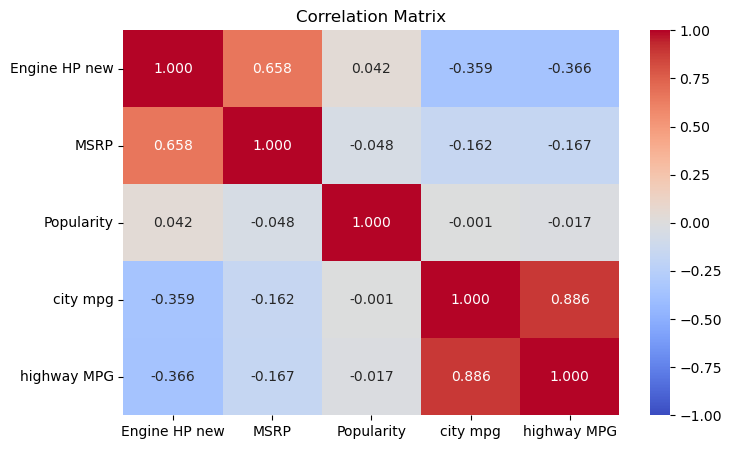

In [42]:
# Creating a heatmap

plt.figure(figsize=(8, 5))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".3f", vmin=-1, vmax=1)
plt.title("Correlation Matrix")
plt.xticks(rotation=0, fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.show()

## 5. Share

Final plots and visualizations are created in R (see `r_visuals/` folder).

Visual insights include:
- Distribution of MSRP
- Correlation Heatmap

## Distribution of City MPG

![City MPG Histogram](../r_visuals/plots/city_mpg_histogram.png)

---

## Average MSRP by Vehicle Size

![MSRP by Vehicle Size](../r_visuals/plots/msrp_by_vehicle_size.png)

---

## Engine HP vs MSRP (log)

![HP vs MSRP](../r_visuals/plots/hp_vs_msrp_log.png)

---

## Correlation Matrix

![Correlation Matrix](../r_visuals/plots/correlation_matrix.png)

## 6. Act

**Recommendations:**
- Focus on high-performance, mid-price models for strong value positioning
- Popularity clusters show potential for expanding compact luxury segment
- Consider refining offerings by drivetrain and fuel type preferences

**Next Steps:**
- Deeper analysis by model year or emissions
- Connect with dealership sales data for further insight

The analysis was based on a dataset with various details about different vehicles.

* The distribution of "City MPG" shows a right skewed histogram. Most values are in the area around 20 MPG, but we have a few values with really high measures of MPG. In this case using the median ist the best idea to check the data.

* The average MSRP by vehicle size shows an expected picture, although the difference between compact and midsize is not as high as I expected it to be. Apparently, there seem to be more cars in the high-end price segment. This results in a small difference between of average MSRP between the compact and the midsize class.

* The scatterplot was one of the most interesting visualisations. The relationship between engine HP and MSRP was as I expected: more HP lead to higher MSRP, but the scatterplot let me ask another question: why do I see two groups? I decided to check for more details, so I used a category for the "Years" column. Having record from 1995 to today, I decided to create 10-year periods. Using this periods let me see the picture more clearer. The "blue" group are mostly cars from 2004 and older. With these categories I found out two things: the relationship between MSRP and enginge HP is as expected (high engine HP lead to high MSRP). The second finding is that in the 1995-2004 group the engine HP is below 400 HP end the MSRP is lower in most cases. If we take a look at younger cars, we can see that the MSRP shows a sharp increase.

* The boxplot reveals that there is a similar MSRP area between all kinds of driven wheels. We can see that there are much more outliers in rear wheel drive and all wheel drive. That can be explained with two information: rear wheel drive is often used in sports cars, and such cars are often expensive. The same can be seen for the all wheel drive section: a lot of large SUV are sold with all wheel drive and we saw before that the avereage MSRP is higher in large sized car category.

* The last visualisation reveals no real surprises. Average MPG for city and highway routes are on a similar level, except the direct drive types are real high. This fact can also be explained with the use of direct drive transmission in sports cars. I guess someone who owns a sports car maybe checks the power of his car.

The heatmap based on "Engine HP new", "MSRP", "Popularity", "city mpg", "highway MPG" shows an interesting fact: There is nearly no correlation between "Popularity" and all the other values. It would be very interesting to know how "Popularity" is measured. Is it because of sells or are there more soft reasons (like a feeling or emotion connected to a car). In my opinion that is a fact worth further investigation.







Summary

The analysis reveals several key insights about vehicle characteristics and pricing. The distribution of “City MPG” is right-skewed, with most vehicles around 20 MPG, making the median a more reliable measure than the mean. The relationship between engine horsepower (HP) and MSRP follows an expected trend—higher HP leads to higher MSRP. However, categorizing vehicles by production years uncovered a notable shift: older vehicles (1995–2004) generally have lower HP and MSRP, while newer models show a significant increase in both metrics. Additionally, the analysis of drivetrain types indicates that rear-wheel drive (RWD) and all-wheel drive (AWD) vehicles exhibit more outliers in price, likely due to the prevalence of high-end sports cars and large SUVs in these categories.

Another key finding is the weak correlation between a vehicle’s “Popularity” and other attributes such as MSRP, MPG, or engine HP. This suggests that “Popularity” may be influenced by factors beyond technical specifications, such as brand perception or marketing. Lastly, the average fuel efficiency for city and highway driving remains relatively stable across most vehicle types, except for direct-drive transmissions, which show notably high MPG—likely due to their use in performance-focused vehicles. These findings highlight important market trends and technological shifts in the automotive industry.